In [59]:
import pandas as pd
import numpy as np


import altair as alt
import seaborn as sns
from sklearn.model_selection import train_test_split
alt.renderers.enable("notebook")
import matplotlib.pyplot as plt
%matplotlib inline


In [60]:
df = pd.read_csv("insurance.csv")

In [61]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [62]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [63]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [64]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [65]:
#Replacing ? symbol with nan
df =df.replace('?', np.NaN)

In [66]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
print(vars_with_na)
# determine percentage of missing values
df[vars_with_na].isnull().mean()

['collision_type', 'property_damage', 'police_report_available']


collision_type             0.178
property_damage            0.360
police_report_available    0.343
dtype: float64

In [67]:
df['collision_type']

0       Side Collision
1                  NaN
2       Rear Collision
3      Front Collision
4                  NaN
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999                NaN
Name: collision_type, Length: 1000, dtype: object

In [68]:
cat_vars = [var for var in df.columns if df[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))
df[cat_vars].head()

Number of categorical variables:  21


,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2014-10-17 00:00:00,OH,250/500,MALE,MD,craft-repair,sleeping,husband,2015-01-25 00:00:00,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,2006-06-27 00:00:00,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,2015-01-21 00:00:00,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NaN,NaN,Mercedes,E400,Y
2,2000-09-06 00:00:00,OH,100/300,FEMALE,PhD,sales,board-games,own-child,2015-02-22 00:00:00,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,1990-05-25 00:00:00,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,2015-01-10 00:00:00,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,NaN,NO,Chevrolet,Tahoe,Y
4,2014-06-06 00:00:00,IL,500/1000,MALE,Associate,sales,board-games,unmarried,2015-02-17 00:00:00,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [69]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [70]:
#Collision type count

Text(0, 0.5, 'Frequency')

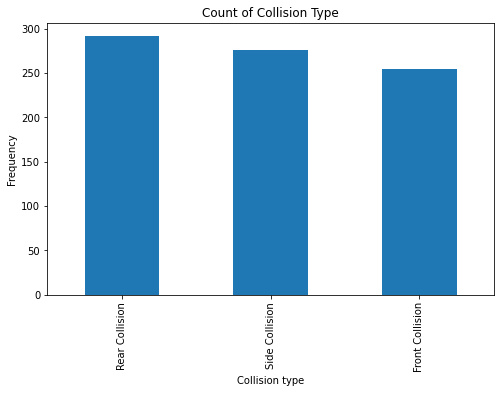

In [71]:
ax = df['collision_type'].value_counts().plot(kind='bar',
                                    figsize=(8,5),
                                    title="Count of Collision Type")
ax.set_xlabel("Collision type")
ax.set_ylabel("Frequency")

In [72]:
#Police report

Text(0, 0.5, 'Frequency')

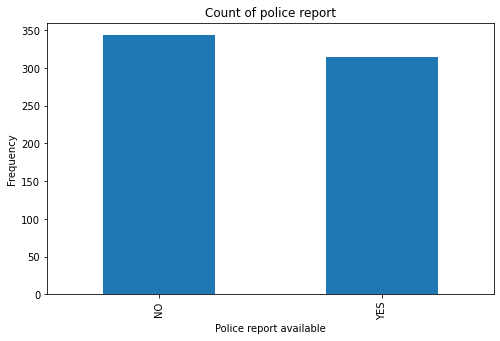

In [73]:
ax = df['police_report_available'].value_counts().plot(kind='bar',
                                    figsize=(8,5),
                                    title="Count of police report")
ax.set_xlabel("Police report available")
ax.set_ylabel("Frequency")

C:\Users\mukes\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='age,insured_sex'>

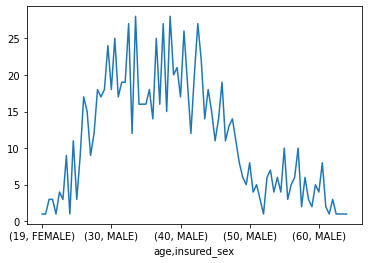

In [74]:
df.groupby(['age','insured_sex']).age.count().plot()

In [75]:
# Fill missing values  (Strategy type can be changed depending upon the data and business problem) -mean/median/mostfrequent

In [76]:
   from sklearn.impute import SimpleImputer
   from sklearn.base import TransformerMixin

   class CustomImputer(TransformerMixin):
         def __init__(self, cols=None, strategy='mean'):
               self.cols = cols
               self.strategy = strategy

         def transform(self, df):
               X = df.copy()
               impute = SimpleImputer(strategy=self.strategy)
               if self.cols == None:
                      self.cols = list(X.columns)
               for col in self.cols:
                      if X[col].dtype == np.dtype('O') : 
                             X[col].fillna(X[col].value_counts().index[0], inplace=True)
                      else : X[col] = impute.fit_transform(X[[col]])

               return X

         def fit(self, *_):
               return self

In [77]:
 cci = CustomImputer(cols=['property_damage', 'police_report_available','collision_type']) # here default strategy = mean
 df = cci.fit_transform(df)

In [78]:
df.isnull().sum().sort_values(ascending=False)

fraud_reported                 0
insured_zip                    0
capital-loss                   0
capital-gains                  0
insured_relationship           0
insured_hobbies                0
insured_occupation             0
insured_education_level        0
insured_sex                    0
umbrella_limit                 0
incident_type                  0
policy_annual_premium          0
policy_deductable              0
policy_csl                     0
policy_state                   0
policy_bind_date               0
policy_number                  0
age                            0
incident_date                  0
collision_type                 0
auto_year                      0
witnesses                      0
auto_model                     0
auto_make                      0
vehicle_claim                  0
property_claim                 0
injury_claim                   0
total_claim_amount             0
police_report_available        0
bodily_injuries                0
incident_s

## Exploratory data analysis

In [79]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [80]:
numerical_var = []
for var in df.columns:
    if df[var].dtypes != 'O':
        numerical_var.append(var)
df[numerical_var].head()  

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


<AxesSubplot:xlabel='age', ylabel='injury_claim'>

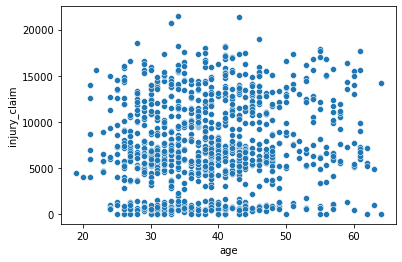

In [81]:
sns.scatterplot(x ="age",  
             y ="injury_claim",  
             data = df) 

In [82]:
discrete_vars = [var for var in numerical_var if len(
    df[var].unique()) < 20 ]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  5


In [83]:
#df['fraud_reported'].replace(to_replace= 'Y', value=1)

In [84]:
df[discrete_vars]

,policy_deductable,umbrella_limit,number_of_vehicles_involved,bodily_injuries,witnesses
0,1000,0,1,1,2
1,2000,5000000,1,0,0
2,2000,5000000,3,2,3
3,2000,6000000,1,1,2
4,1000,6000000,1,0,1
...,...,...,...,...,...
995,1000,0,1,0,1
996,1000,0,1,2,3
997,500,3000000,3,2,3
998,2000,5000000,1,0,1


Text(0, 0.5, 'Frequency')

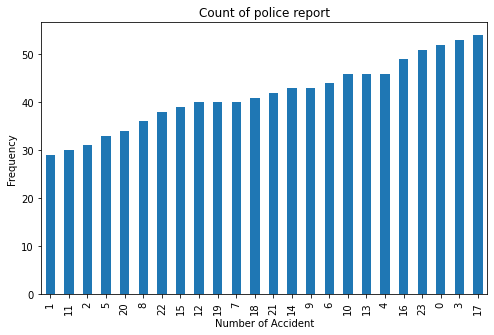

In [85]:
ax = df['incident_hour_of_the_day'].value_counts(ascending = True).plot(kind='bar',
                                    figsize=(8,5),
                                    title="Count of police report")
ax.set_xlabel("Number of Accident")
ax.set_ylabel("Frequency")

In [86]:
print(df['capital-loss'].sum())
print(df['capital-gains'].sum())

-26793700
25126100


C:\Users\mukes\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='auto_year', ylabel='fraud_reported'>

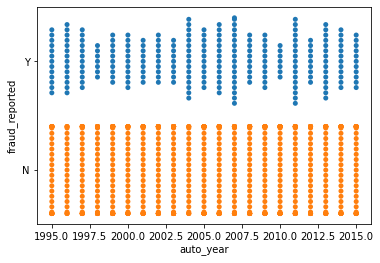

In [87]:
sns.swarmplot(x="auto_year", y="fraud_reported", data=df)

<AxesSubplot:xlabel='auto_year'>

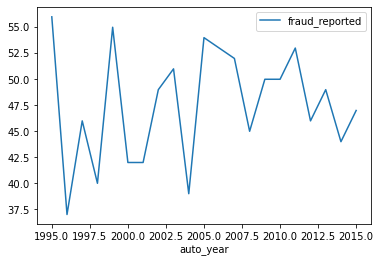

In [88]:
df[['fraud_reported','auto_year']].groupby('auto_year').count().plot()

In [89]:
cont_vars = [
    var for var in numerical_var if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  13


In [90]:
df[cont_vars]

,months_as_customer,age,policy_number,policy_annual_premium,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1406.91,466132,53300,0,5,71610,6510,13020,52080,2004
1,228,42,342868,1197.22,468176,0,0,8,5070,780,780,3510,2007
2,134,29,687698,1413.14,430632,35100,0,7,34650,7700,3850,23100,2007
3,256,41,227811,1415.74,608117,48900,-62400,5,63400,6340,6340,50720,2014
4,228,44,367455,1583.91,610706,66000,-46000,20,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1310.80,431289,0,0,20,87200,17440,8720,61040,2006
996,285,41,186934,1436.79,608177,70900,0,23,108480,18080,18080,72320,2015
997,130,34,918516,1383.49,442797,35100,0,4,67500,7500,7500,52500,1996
998,458,62,533940,1356.92,441714,0,0,2,46980,5220,5220,36540,1998


In [91]:
cat_vars = [var for var in df.columns if df[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  21


In [92]:
df[cat_vars].nunique() #for encoding

policy_bind_date            951
policy_state                  3
policy_csl                    3
insured_sex                   2
insured_education_level       7
insured_occupation           14
insured_hobbies              20
insured_relationship          6
incident_date                60
incident_type                 4
collision_type                3
incident_severity             4
authorities_contacted         5
incident_state                7
incident_city                 7
incident_location          1000
property_damage               2
police_report_available       2
auto_make                    14
auto_model                   39
fraud_reported                2
dtype: int64

In [93]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [94]:
df_fraud = df[df['fraud_reported'] == 'Y']

In [95]:
df_fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
5,256,39,104594,2006-10-12 00:00:00,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
14,180,38,644081,1998-12-28 00:00:00,OH,250/500,2000,1301.13,0,476685,...,2,YES,46200,4200,8400,33600,Dodge,Neon,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,234,41,291006,1990-05-16 00:00:00,IN,100/300,500,951.56,0,455426,...,1,NO,98280,15120,7560,75600,Chevrolet,Tahoe,2007,Y
977,266,42,929306,2003-03-06 00:00:00,IN,100/300,500,1093.83,4000000,468454,...,1,NO,53280,4440,8880,39960,Suburu,Impreza,2015,Y
982,230,43,490514,2007-02-09 00:00:00,IN,500/1000,2000,1101.83,0,451529,...,3,YES,51900,5190,10380,36330,BMW,M5,2011,Y
986,232,42,182953,2013-04-30 00:00:00,IN,100/300,500,944.03,0,440153,...,3,NO,77000,15400,7700,53900,Toyota,Highlander,2015,Y


<AxesSubplot:ylabel='Frequency'>

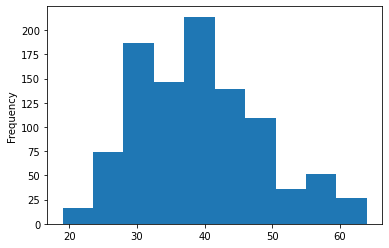

In [96]:
df['age'].plot(kind = 'hist')

In [97]:
df_fraud.groupby('age')['total_claim_amount'].sum().head()

age
19     48950
22     86130
23    264370
24     71460
25    250710
Name: total_claim_amount, dtype: int64

In [98]:
df_fraud.groupby('auto_make')['total_claim_amount'].sum()

auto_make
Accura         743850
Audi          1202360
BMW           1212470
Chevrolet     1299350
Dodge         1284770
Ford          1407670
Honda          761570
Jeep           687290
Mercedes      1176930
Nissan         846520
Saab          1083610
Suburu        1209580
Toyota         809820
Volkswagen    1168830
Name: total_claim_amount, dtype: int64

In [99]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [100]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [101]:
df[cat_vars].head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2014-10-17 00:00:00,OH,250/500,MALE,MD,craft-repair,sleeping,husband,2015-01-25 00:00:00,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,2006-06-27 00:00:00,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,2015-01-21 00:00:00,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,E400,Y
2,2000-09-06 00:00:00,OH,100/300,FEMALE,PhD,sales,board-games,own-child,2015-02-22 00:00:00,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,1990-05-25 00:00:00,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,2015-01-10 00:00:00,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe,Y
4,2014-06-06 00:00:00,IL,500/1000,MALE,Associate,sales,board-games,unmarried,2015-02-17 00:00:00,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [102]:
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [103]:
import altair as alt
alt.renderers.enable("default")

RendererRegistry.enable('default')

In [104]:
alt.Chart(df).mark_bar().encode(
    alt.X("insured_education_level"),
    y='count()',
    
)

alt.Chart(...)

In [105]:
#Slicing policy_bind_date to get the year
df['policy_bind_date'] = df['policy_bind_date'].str.slice(0,4).astype(int)

#Using one hot encoding for US states
df['policy_state'] = df['policy_state'].astype('category').cat.codes 

df['policy_csl'].unique()

df['policy_csl'] = df['policy_csl'].replace(to_replace = '250/500', value=750)
df['policy_csl'] = df['policy_csl'].replace(to_replace = '100/300', value=400)
df['policy_csl'] = df['policy_csl'].replace(to_replace = '500/1000', value=1500)

# Encoding Male as 0, Female as 1
df['insured_sex'] = df['insured_sex'].replace(to_replace = 'MALE', value=0)
df['insured_sex'] = df['insured_sex'].replace(to_replace = 'FEMALE', value=1)

df['insured_education_level'].unique()

df['insured_education_level'] = df['insured_education_level'].replace(to_replace = 'High School', value=0)
df['insured_education_level'] = df['insured_education_level'].replace(to_replace = ['College','Associate'], value=1)
df['insured_education_level'] = df['insured_education_level'].replace(to_replace = ['Masters','MD','JD'], value=2)
df['insured_education_level'] = df['insured_education_level'].replace(to_replace = 'PhD', value=3)


df['insured_occupation'] = df['insured_occupation'].astype('category').cat.codes
df['insured_hobbies'] = df['insured_hobbies'].astype('category').cat.codes
df['insured_relationship'] = df['insured_relationship'].astype('category').cat.codes


df['incident_date'] = df['incident_date'].str.slice(0,4).astype(int)


In [106]:

df['incident_type'].unique()

df['incident_type'] = df['incident_type'].replace(to_replace = ['Vehicle Theft','Parked Car'], value=0)
df['incident_type'] = df['incident_type'].replace(to_replace = 'Single Vehicle Collision', value=1)
df['incident_type'] = df['incident_type'].replace(to_replace = 'Multi-vehicle Collision', value=2)


df['collision_type'] = df['collision_type'].astype('category').cat.codes 

df['incident_severity'].unique()

df['incident_severity'] = df['incident_severity'].replace(to_replace = ['Trivial Damage','Minor Damage'], value=0)
df['incident_severity'] = df['incident_severity'].replace(to_replace = 'Major Damage', value=1)
df['incident_severity'] = df['incident_severity'].replace(to_replace = 'Total Loss', value=2)

df['authorities_contacted'].unique()

df['authorities_contacted'] = df['authorities_contacted'].replace(to_replace = ['None','Other'], value=0)
df['authorities_contacted'] = df['authorities_contacted'].replace(to_replace = 'Fire', value=1)
df['authorities_contacted'] = df['authorities_contacted'].replace(to_replace = ['Police','Ambulance'], value=2)

In [107]:

df['incident_state'] = df['incident_state'].astype('category').cat.codes
df['incident_city'] = df['incident_city'].astype('category').cat.codes
df['auto_make'] = df['auto_make'].astype('category').cat.codes
df['auto_model'] = df['auto_model'].astype('category').cat.codes

df = df.drop('incident_location', axis=1)


df['property_damage'] = df['property_damage'].replace(to_replace = 'NO', value=0)
df['property_damage'] = df['property_damage'].replace(to_replace = 'YES', value=1)
df['police_report_available'] = df['police_report_available'].replace(to_replace = 'NO', value=0)
df['police_report_available'] = df['police_report_available'].replace(to_replace = 'YES', value=1)
df['fraud_reported'] = df['fraud_reported'].replace(to_replace = 'N', value=0)
df['fraud_reported'] = df['fraud_reported'].replace(to_replace = 'Y', value=1)


In [108]:
df = df.drop('policy_number', axis=1)

## Correlation Analysis

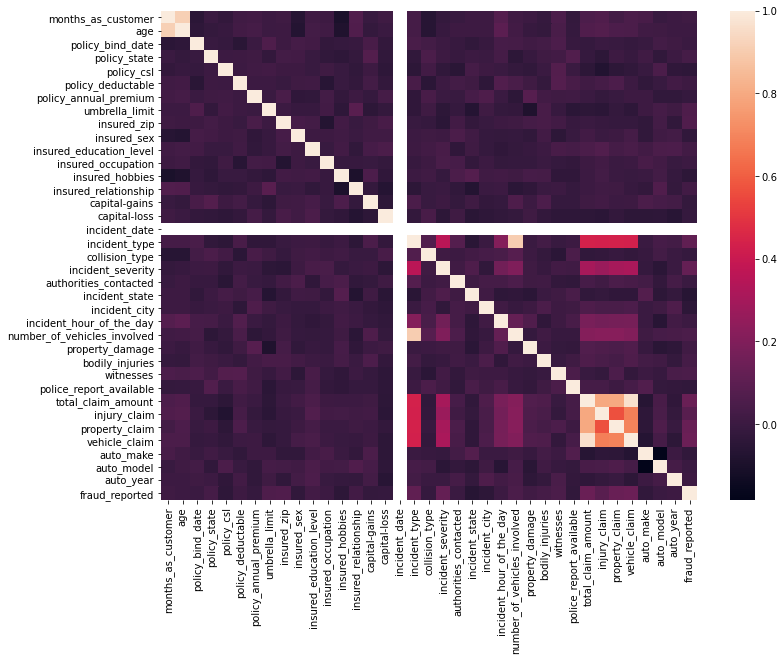

In [109]:
# Complete numerical correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr(method="spearman")
f, ax = plt.subplots(figsize=(12, 9))
corrmat
sns.heatmap(corrmat, xticklabels=True, yticklabels=True);


In [110]:
upper_tri = corrmat.where(np.triu(np.ones(corrmat.shape),k=1).astype(np.bool))
print(upper_tri)

                             months_as_customer       age  policy_bind_date  \
months_as_customer                          NaN  0.912725         -0.046236   
age                                         NaN       NaN         -0.035675   
policy_bind_date                            NaN       NaN               NaN   
policy_state                                NaN       NaN               NaN   
policy_csl                                  NaN       NaN               NaN   
policy_deductable                           NaN       NaN               NaN   
policy_annual_premium                       NaN       NaN               NaN   
umbrella_limit                              NaN       NaN               NaN   
insured_zip                                 NaN       NaN               NaN   
insured_sex                                 NaN       NaN               NaN   
insured_education_level                     NaN       NaN               NaN   
insured_occupation                          NaN     

In [112]:
to_drop = [column for column in corrmat.columns if any(corrmat[column] > 0.95)]
print(to_drop)

['months_as_customer', 'age', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported']


In [113]:
# Dropping colinear variables
df = df.drop('months_as_customer', axis=1)
df = df.drop('vehicle_claim', axis=1)
df = df.drop('injury_claim', axis=1)
df = df.drop('property_claim', axis=1)

### Outlier Analysis

C:\Users\mukes\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


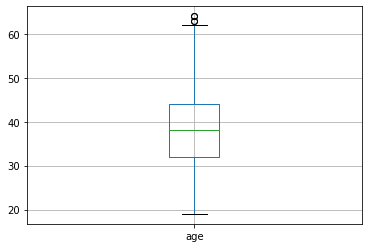

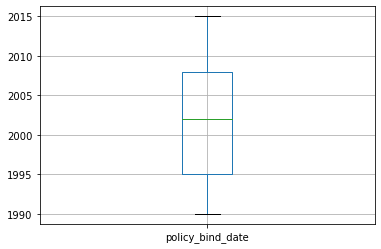

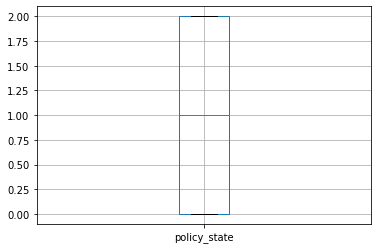

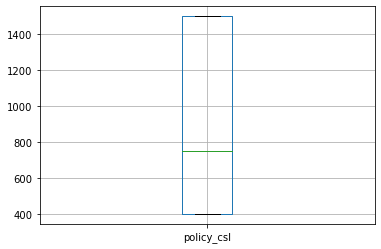

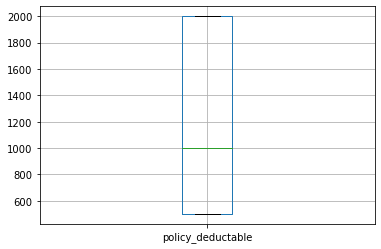

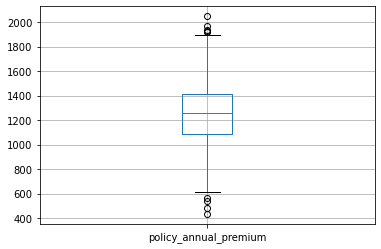

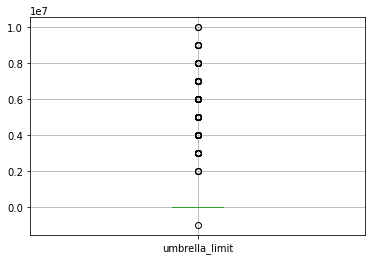

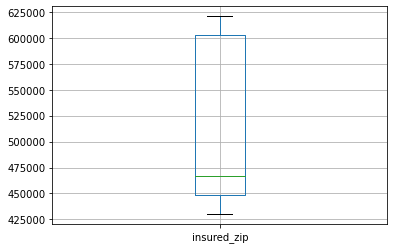

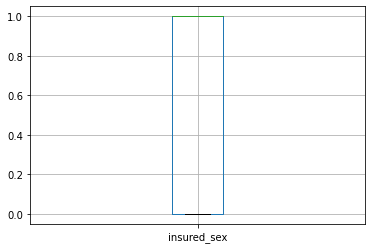

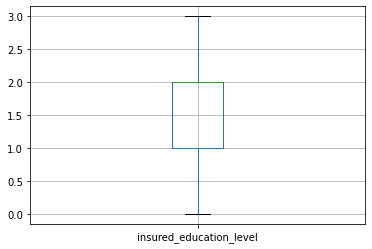

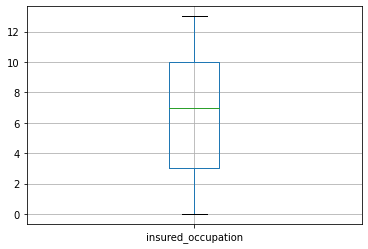

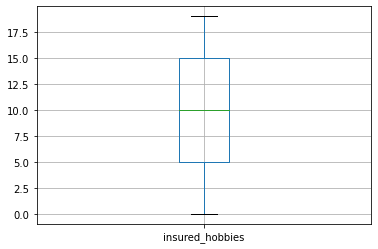

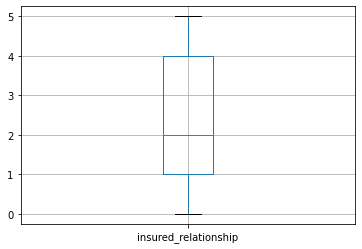

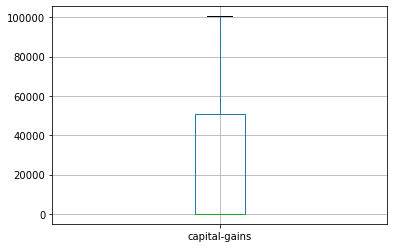

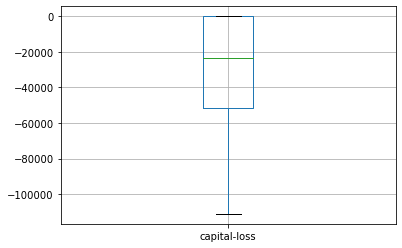

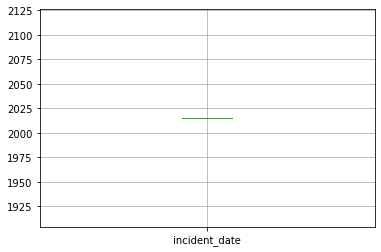

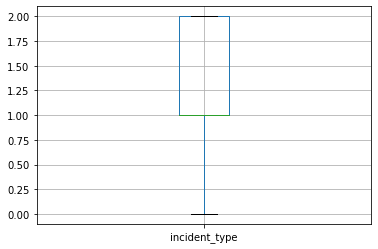

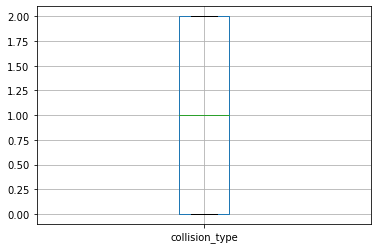

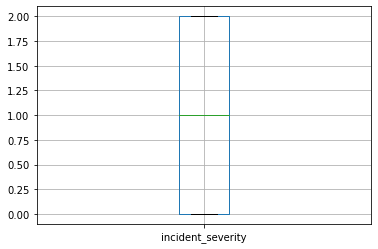

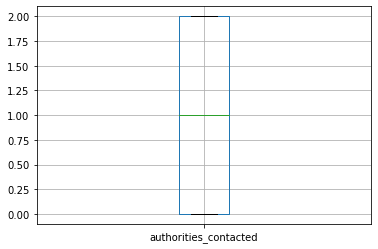

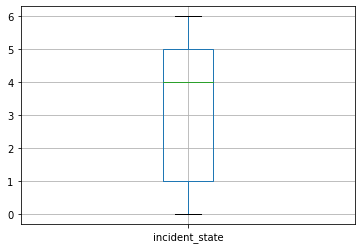

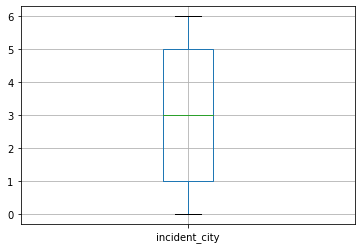

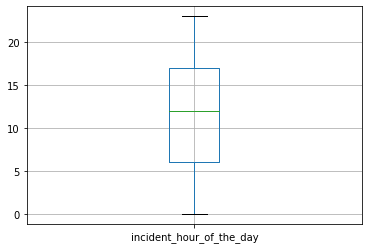

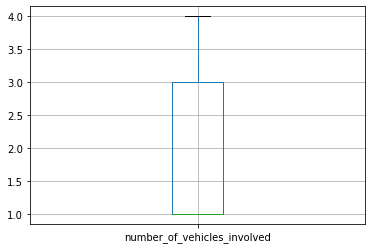

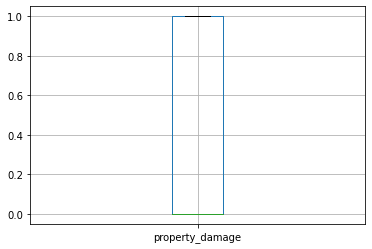

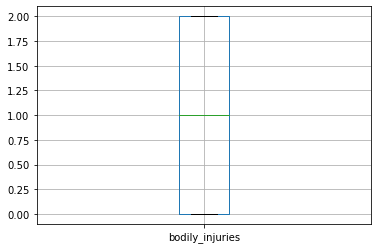

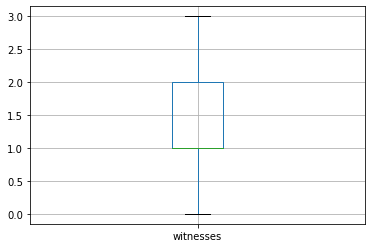

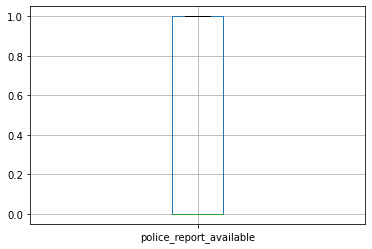

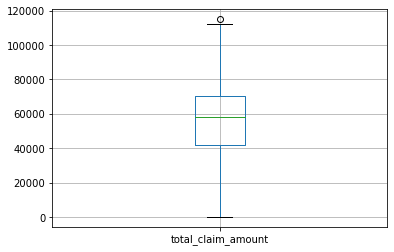

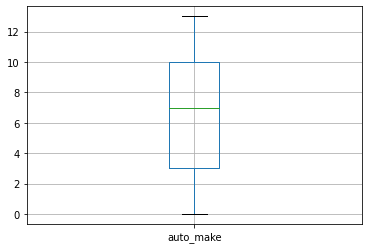

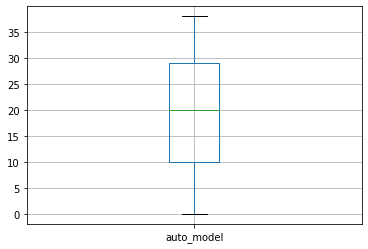

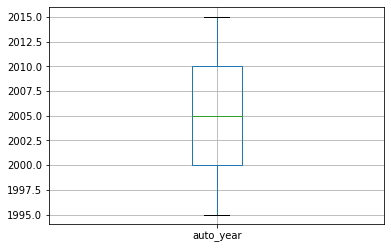

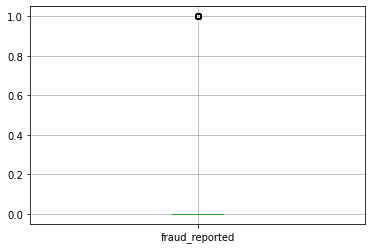

In [114]:
import seaborn as sns
for column in df.columns:
    plt.figure()
    df.boxplot([column])

In [115]:
df = df[df.policy_annual_premium>600]
df = df[df.policy_annual_premium<1900]

In [116]:
df = df.drop('umbrella_limit', axis=1)

In [117]:
y = df['fraud_reported']
X= df.drop('fraud_reported', axis=1)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 1000)

## Modelling (Building Meta Classifier) - Using stacking technology

Stacking is similar to ensemble technique where the predictions of multiple classifiers are used as a new features to train a meta-classifier. Metaclassifier can be any classifier algorithms.

In [119]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Classifiers
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier # <- Here is our boy

# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')

In [120]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [121]:
# Initializing Support Vector classifier
classifier1 = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)

# Initializing Multi-layer perceptron  classifier
classifier2 = MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (10,10,10),
                            learning_rate = "constant", max_iter = 2000, random_state = 1000)

# Initialing Nu Support Vector classifier
classifier3 = NuSVC(degree = 1, kernel = "rbf", nu = 0.25, probability = True)

# Initializing Random Forest classifier
classifier4 = RandomForestClassifier(n_estimators = 500, criterion = "gini", max_depth = 10,
                                     max_features = "auto", min_samples_leaf = 0.005,
                                     min_samples_split = 0.005, n_jobs = -1, random_state = 1000)

In [122]:
sclf = StackingCVClassifier(classifiers = [classifier1, classifier2, classifier3, classifier4],
                            shuffle = False,
                            use_probas = True,
                            cv = 5,
                            meta_classifier = SVC(probability = True))

In [123]:
# Create list to store classifiers
classifiers = {"SVC": classifier1,
               "MLP": classifier2,
               "NuSVC": classifier3,
               "RF": classifier4,
               "Stack": sclf}

In [124]:
# Train classifiers
for key in classifiers:
    # Get classifier
    classifier = classifiers[key]
    
    # Fit classifier
    classifier.fit(X_train, y_train)
        
    # Save fitted classifier
    classifiers[key] = classifier

In machine learning, a probabilistic classifier is a classifier that is able to predict, given an observation of an input, a probability distribution over a set of classes, rather than only outputting the most likely class that the observation should belong to. Probabilistic classifiers provide classification that can be useful in its own right or when combining classifiers into ensembles.

In [125]:
results = pd.DataFrame()
for key in classifiers:
    # Make prediction on test set
    y_pred = classifiers[key].predict_proba(X_test)[:,1]
    
    # Save results in pandas dataframe object
    results[f"{key}"] = y_pred

# Add the test set to the results object
results["Target"] = y_test

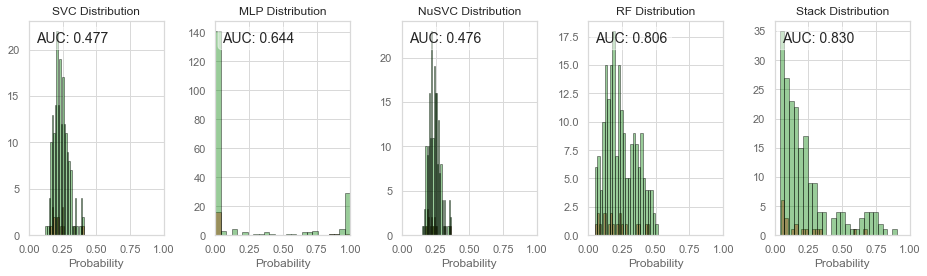

In [126]:
# Probability Distributions Figure
# Set graph style
sns.set(font_scale = 1)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Plot
f, ax = plt.subplots(figsize=(13, 4), nrows=1, ncols = 5)

for key, counter in zip(classifiers, range(5)):
    # Get predictions
    y_pred = results[key]
    
    # Get AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    textstr = f"AUC: {auc:.3f}"

    # Plot false distribution
    false_pred = results[results["Target"] == 0]
    sns.distplot(false_pred[key], hist=True, kde=False, 
                 bins=int(25), color = 'red',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    # Plot true distribution
    true_pred = results[results["Target"] == 1]
    sns.distplot(results[key], hist=True, kde=False, 
                 bins=int(25), color = 'green',
                 hist_kws={'edgecolor':'black'}, ax = ax[counter])
    
    
    # These are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    
    # Place a text box in upper left in axes coords
    ax[counter].text(0.05, 0.95, textstr, transform=ax[counter].transAxes, fontsize=14,
                    verticalalignment = "top", bbox=props)
    
    # Set axis limits and labels
    ax[counter].set_title(f"{key} Distribution")
    ax[counter].set_xlim(0,1)
    ax[counter].set_xlabel("Probability")

# Tight layout
plt.tight_layout()



AUC is less than 1, i.e good results.

In [251]:
# Define parameter grid 
params = {"meta_classifier__kernel": ["linear", "rbf", "poly"],
          "meta_classifier__C": [1, 2],
          "meta_classifier__degree": [3, 4, 5],
          "meta_classifier__probability": [True]}


# Initialize GridSearchCV
grid = GridSearchCV(estimator = sclf, 
                    param_grid = params, 
                    cv = 5,
                    scoring = "roc_auc",
                    verbose = 10,
                    n_jobs = -1)

# Fit GridSearchCV
grid.fit(X_train, y_train)

# Making prediction on test set
y_pred = grid.predict_proba(X_test)[:,1]

# Getting AUC
auc = metrics.roc_auc_score(y_test, y_pred)

# Print results
print(f"The AUC of the tuned Stacking classifier is {auc:.3f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:  5.1min remaining:   18.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.4min finished


The AUC of the tuned Stacking classifier is 0.831


In [ ]:
import itertools  

# Classifier labels
classifier_labels = ["SVC", "MLP", "NuSVC", "RF"]

# Get all unique combinations of classifier with a set size greater than or equal to 2
combo_classifiers = []
for ii in range(2, len(classifier_labels)+1):
    for subset in itertools.combinations(classifier_labels, ii):
        combo_classifiers.append(subset)

# Stack, tune, and evaluate stack of classifiers
for combo in combo_classifiers:
    # Get labels of classifier to create a stack
    labels = list(combo)
     
    # Get classifiers
    classifier_combo = []
    for ii in range(len(labels)):
        label = classifier_labels[ii]
        classifier = classifiers[label]
        classifier_combo.append(classifier)
         
    # Initializing the StackingCV classifier
    sclf = StackingCVClassifier(classifiers = classifier_combo,
                                shuffle = False,
                                use_probas = True,
                                cv = 5,
                                meta_classifier = SVC(probability = True),
                                n_jobs = -1)
    
    # Initialize GridSearchCV
    grid = GridSearchCV(estimator = sclf, 
                        param_grid = params, 
                        cv = 5,
                        scoring = "roc_auc",
                        verbose = 0,
                        n_jobs = -1)
    
    # Fit GridSearchCV
    grid.fit(X_train, y_train)
    
    # Making prediction on test set
    y_pred = grid.predict_proba(X_test)[:,1]
    
    # Getting AUC
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    # Print results
    print(f"AUC of stack {combo}: {auc:.3f}")

AUC of stack ('SVC', 'MLP'): 0.541
AUC of stack ('SVC', 'NuSVC'): 0.394
